Diabetic Prediction using Random Forest

Importing the dependencies

In [3]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve

In [4]:
data = pd.read_csv('/content/diabetes.csv')

In [5]:
y=data.iloc[:,[8]]
x=data.iloc[:,[1,2,3,4,5,6,7]]

In [6]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [7]:
clf=tree.DecisionTreeClassifier(criterion='gini',min_samples_split=30,splitter="best")
clf=clf.fit(X_train,Y_train)


In [8]:
y_pred=clf.predict(X_test)

In [9]:
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0]


In [10]:
accuracy=accuracy_score(Y_test,y_pred)
print(str(accuracy*100)+" % accuracy")

75.32467532467533 % accuracy


In [11]:
average_precision = average_precision_score(Y_test,y_pred)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.49


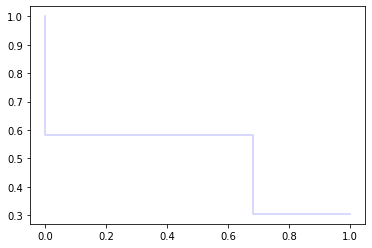

In [12]:
precision, recall, _ = precision_recall_curve(Y_test, y_pred)
plt.step(recall, precision, color='b', alpha=0.2,where = 'post')


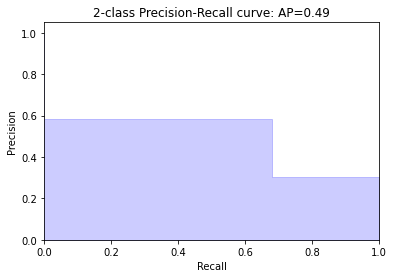

In [13]:
plt.fill_between(recall, precision, step='post', alpha=0.2,color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))
plt.show()